<a href="https://colab.research.google.com/github/yuri200819/-/blob/main/2021%E5%B9%B41%E6%9C%8815%E6%97%A5%EF%BE%86%EF%BD%AD%EF%BD%B0%EF%BE%97%EF%BE%99%EF%BE%88%EF%BD%AF%EF%BE%84%EF%BE%9C%EF%BD%B0%EF%BD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

In [6]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

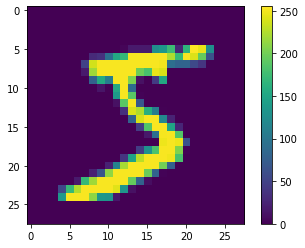

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

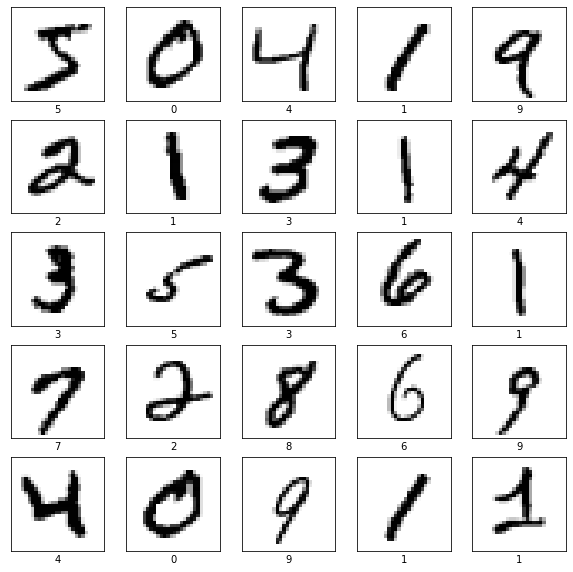

In [12]:
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4748 - accuracy: 0.8626
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1523 - accuracy: 0.9551
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1112 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0907 - accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9776


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 0s - loss: 0.0762 - accuracy: 0.9763

Test accuracy: 0.9763000011444092


In [17]:
predictions = model.predict(test_images)
predictions[0]

array([7.2952034e-08, 1.2674860e-09, 3.1476968e-05, 1.1938119e-03,
       2.1777333e-11, 9.0169738e-07, 4.7302784e-15, 9.9876320e-01,
       1.5203291e-07, 1.0322558e-05], dtype=float32)

In [18]:
np.argmax(predictions[0])

7

In [19]:
test_labels[0]

7

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                     class_names[true_label]),
                                     color=color)

In [21]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

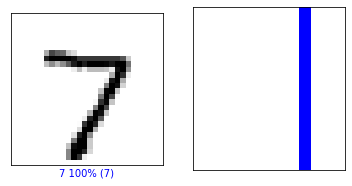

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

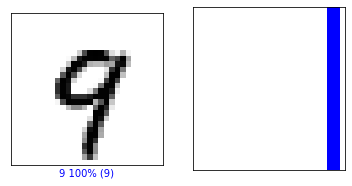

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


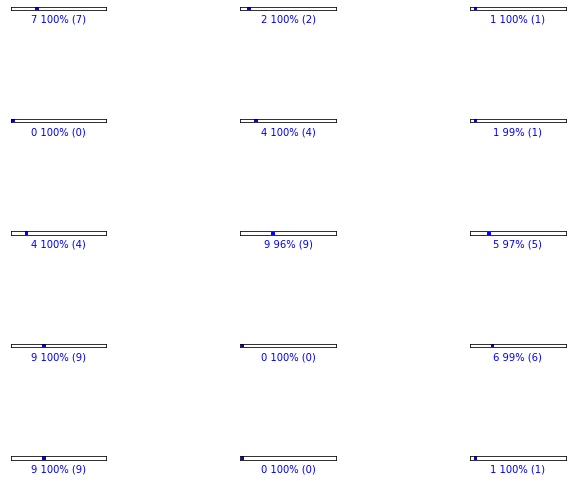

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [25]:
img = test_images[0]
print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = model.predict(img)
print(predictions_single)

[[7.29518916e-08 1.26748601e-09 3.14770004e-05 1.19381293e-03
  2.17772918e-11 9.01699082e-07 4.73027836e-15 9.98763204e-01
  1.52032911e-07 1.03225675e-05]]


In [28]:
np.argmax(predictions_single[0])

7